<a href="https://colab.research.google.com/github/ahmadbadawikr/DS_and_ML/blob/master/DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df = pd.read_csv("/content/gdrive/My Drive/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
# a mapping dictionary that maps the quality values from 0 to 5
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}

# you can use the map function of pandas with
# any dictionary to convert the values in a given
# column to values in the dictionary
df.loc[:, "quality"] = df.quality.map(quality_mapping)

In [ ]:
# use sample with frac=1 to shuffle the dataframe
# we reset the indices since they change after
# shuffling the dataframe
df = df.sample(frac=1).reset_index(drop=True)

# top 1000 rows are selected
# for training
df_train = df.head(1000)

# bottom 599 values are selected
# for testing/validation
df_test = df.tail(599)

In [ ]:
# import from scikit-learn
from sklearn import tree
from sklearn import metrics

# initialize decision tree classifier class
# with a max_depth of 3
clf = tree.DecisionTreeClassifier(max_depth=3)

# choose the columns you want to train on
# these are the features for the model
cols = ['fixed acidity', 
        'volatile acidity', 
        'citric acid', 
        'residual sugar',
        'chlorides',
        'free sulfur dioxide',
        'total sulfur dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol']

# train the model on the provided features
# and mapped quality from before
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# generate predictions on the training set
train_predictions = clf.predict(df_train[cols])

# generate predictions on the test set
test_predictions = clf.predict(df_test[cols])

# calculate the accuracy of predictions on
# training data set
train_accuracy = metrics.accuracy_score(
    df_train.quality, train_predictions
)

# calculate the accuracy of predictions on
# test data set
test_accuracy = metrics.accuracy_score(
    df_test.quality, test_predictions
)


In [ ]:
print(train_accuracy, test_accuracy)

0.587 0.5626043405676127


In [ ]:
import matplotlib
import matplotlib.pyplot as plt

# this is our global size of label text
# on the plots
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

# This line ensures that the plot is displayed
# inside the notebook
%matplotlib inline 

# initialize lists to store accuracies
# for training and test data
# we start with 50% accuracy
train_accuracies = [0.5]
test_accuracies = [0.5]


In [ ]:
# iterate over a few depth values
for depth in range(1, 25): 
    # init the model 
    clf = tree.DecisionTreeClassifier(max_depth=depth)

    # columns/features for training
    # note that, this can be done outside 
    # the loop
    cols = [
        'fixed acidity', 
        'volatile acidity',
        'citric acid', 
        'residual sugar',
        'chlorides',
        'free sulfur dioxide', 
        'total sulfur dioxide',
        'density',
        'pH', 
        'sulphates',
        'alcohol']
     # fit the model on given features
    clf.fit(df_train[cols], df_train.quality)

    # create training & test predictions
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])

    # calculate training & test accuracies
    train_accuracy = metrics.accuracy_score(
        df_train.quality, train_predictions
    )
    test_accuracy = metrics.accuracy_score(
        df_test.quality, test_predictions
    )
    
    # append accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy) 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


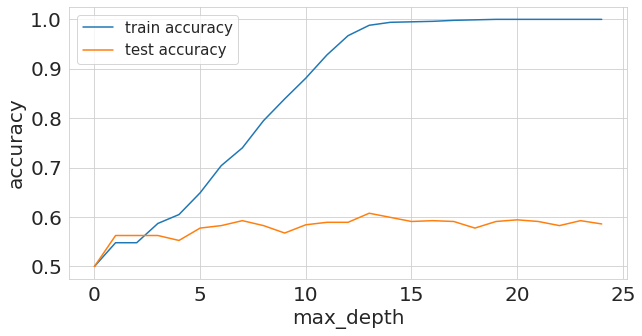

In [ ]:
import seaborn as sns
# create two plots using matplotlib
# and seaborn
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 15}) 
plt.xticks(range(0, 26, 5)) 
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()